# Custom Seeds with the WaterShed Algorithm

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the Image and make a Copy

In [2]:
road = cv2.imread('../DATA/priroda-gory.jpg')
road_copy = np.copy(road)

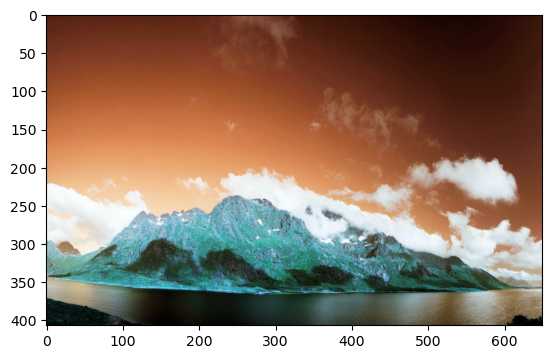

In [3]:
plt.imshow(road)

### Create an empty space for the the result to be drawn

In [4]:
road.shape

(407, 650, 3)

In [5]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [6]:
segments = np.zeros(road.shape, dtype=np.uint8)

In [7]:
segments.shape

(407, 650, 3)

# Create colors for Markers
* https://matplotlib.org/examples/color/colormaps_reference.html

In [8]:
from matplotlib import cm

# Returns (R,G,B,Alpha)

In [9]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [11]:
np.array(cm.tab10(1))

array([1.        , 0.49803922, 0.05490196, 1.        ])

In [12]:
np.array(cm.tab10(1))[:3]*255

array([255., 127.,  14.])

In [13]:
x = np.array(cm.tab10(1))[:3]*255

In [14]:
x.astype(int)

array([255, 127,  14])

In [15]:
tuple(x.astype(int))

(255, 127, 14)

In [16]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [17]:
colors = []

In [18]:
for i in range(10):
    colors.append(create_rgb(i))

In [19]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

# Setting Up Callback Function

In [20]:
n_markers = 10

In [21]:
# default settings
current_marker = 1
marks_updated = False

In [22]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
                
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [23]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)

    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
       
  
    elif k > 0 and chr(k).isdigit():      
        current_marker  = int(chr(k))
   
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

In [26]:
chr(52)

'4'